In [3]:
%autosave 60

Autosaving every 60 seconds


In [73]:
# data analysis
import pandas as pd

# math & plotting
from scipy.stats import gaussian_kde
from matplotlib import gridspec
import matplotlib.pyplot as plt

# data format
import datetime as dt

Analysis
---------

Some statistic analaysis of these structures.

In [43]:
filepath = "../datasets/PDB_Data_Distribution_by_Resolution.csv"
histopdb = pd.read_csv(filepath, 
                       names=["resolution", "entries"], 
                       comment='#')

# ignore extreme resolution values 
dr = histopdb.resolution.iloc[1:-1].astype('float64')
de = histopdb.entries.iloc[1:-1]
# generate syntetic dataset for boxplot
k = 0
pdb = []
for i in de:
    for j in range(i):
        pdb.append(dr.iloc[k])
    k += 1

In [64]:
# load data
path = "../datasets/PDB_H+Cl_exchange_transporters.csv"
data = pd.read_csv(path)

# convert string to datatime
data.deposition_date = pd.to_datetime(data.deposition_date, 
                                      format='%Y-%m-%d')

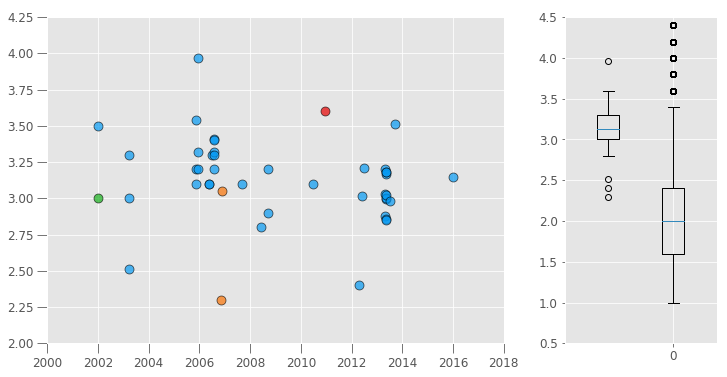

In [158]:
plt.style.use('ggplot')

# Plot canvas
fig = plt.figure(figsize=(12, 6)) 
gsc = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
ax0 = plt.subplot(gsc[0])
ax1 = plt.subplot(gsc[1])

# global parameters
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# palette
count = 0
palet = ['xkcd:azure', 
         'xkcd:green', 
         'xkcd:orange', 
         'xkcd:red']

# gene_name unique values
genes = data.gene_name.unique()

# plot date graph
for name in genes:
    subs = data[data.gene_name == name]
    ax0.plot_date(subs.deposition_date, 
                  subs.resolution,
                  mec   = 'k',
                  mew   = 0.75,
                  ms    = 9,
                  alpha = 0.7,
                  color = palet[count])
    count += 1

# customize
ax0.tick_params(size=10)
ax0.set_ylim([2.0, 4.25])
ax0.set_xlim([dt.date(2000, 1, 1), 
              dt.date(2018, 1, 1)])

# boxplot
x = [0.5]
s = dict(markersize=6)
ax1.boxplot(data.resolution,
            widths = 0.5,
            positions = x,
            flierprops=s)

x = [2]
ax1.boxplot(pdb,
            widths = 0.5,
            positions = x,
            flierprops=s)

# customize
#\ax1.spines['left'].set_visible(False)
#\ax1.yaxis.set_ticklabels([])
#\ax1.set_yticks([])

ax1.xaxis.set_ticklabels([0,1,2])
#\ax1.set_xticks([])

ax1.set_ylim([0.5, 4.5])
ax1.set_xlim([-0.5,3])

# show
plt.show()